# Dog Emotion Classification Model

Ariann Fernando Arriaga Alcántara A01703556

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/SEMESTRE 8/Desarrollo de aplicaciones avanzadas/Módulo 2 A01703556"
!ls

/content/drive/MyDrive/SEMESTRE 8/Desarrollo de aplicaciones avanzadas/Módulo 2 A01703556
DogEmotionClassificationModel_A01703556.ipynb  files			     test
DogEmotionPrediction.ipynb		       modelClassificationDog.h5     train
ExamplesPredict				       modelClassificationDog.keras  validation


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.math import confusion_matrix
from tensorflow.keras.regularizers import L2

#Declaración de rutas para identificar las carpetas que contienen las imágenes
train_dir = 'train'
test_dir = 'test'
validation_dir = 'validation'


### Preprocesamiento de los datos usando data augmentation

ImageDataGenerator para la creación de imagenes modificadas para el entrenamiento del modelo

In [ ]:
# Generadores de datos con ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
path = "/content/drive/MyDrive/SEMESTRE 8/Desarrollo de aplicaciones avanzadas/Módulo 2 A01703556/files"

#Definición de las direcciones para los generators y sus atributos.
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 32,
							class_mode ='categorical',
							#save_to_dir= path + '/augmented',
              #save_prefix='aug',
              #save_format='png'
							)

test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 32,
					class_mode= 'categorical')

validation_generator = validation_datagen.flow_from_directory(
					validation_dir,
					target_size = (150, 150),
					batch_size = 32,
					class_mode= 'categorical')



Found 2100 images belonging to 3 classes.
Found 450 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


Demostración del preprocesamiento con la generación de imágenes

In [ ]:
#images , labels = train_generator[0]

#print(images.shape)

#numPerCol = 10
#plt.figure()
#f, axarr = plt.subplots(3, numPerCol, figsize=(20, 10))

#Desplegará las imágenes que contenga el batch generado
#for i in range(images.shape[0]) :
  #col = i % numPerCol
  #row = i // numPerCol
  #axarr[row, col].axis('off')
  #axarr[row, col].set_title(str(labels[i]))
  #axarr[row, col].imshow(images[i])

#Modelo usando Transfer Learning

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False

# Capas densas con regularización L2
dense_layer_1 = Dense(256, activation='relu', kernel_regularizer=L2(0.00001))
dense_layer_2 = Dense(128, activation='relu', kernel_regularizer=L2(0.00001))
dense_layer_3 = Dense(512, activation='relu', kernel_regularizer=L2(0.00001))

# Definición del modelo secuencial
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(dense_layer_3)
model.add(layers.Dropout(0.6))
model.add(dense_layer_1)
model.add(layers.Dropout(0.4))
model.add(dense_layer_2)
model.add(layers.Dropout(0.4))
model.add(layers.Dense(3, activation='softmax'))

model.summary()



Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_15 (Flatten)        (None, 8192)              0         
                                                                 
 dense_62 (Dense)            (None, 512)               4194816   
                                                                 
 dropout_27 (Dropout)        (None, 512)               0         
                                                                 
 dense_60 (Dense)            (None, 256)               131328    
                                                                 
 dropout_28 (Dropout)        (None, 256)               0         
                                                                 
 dense_61 (Dense)            (None, 128)             

In [ ]:
# Compilación del modelo
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=0.0001),
              metrics=['acc'])

# Entrenamiento del modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=80,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
)

# Guardado del modelo
model.save('modelClassificationDog.h5')
model.save('modelClassificationDog.keras')

Epoch 1/80
65/65 [==============================] - 19s 277ms/step - loss: 1.2868 - acc: 0.3554 - val_loss: 1.0569 - val_acc: 0.4799
Epoch 2/80
65/65 [==============================] - 18s 279ms/step - loss: 1.1250 - acc: 0.4057 - val_loss: 0.9982 - val_acc: 0.5268
Epoch 3/80
65/65 [==============================] - 18s 279ms/step - loss: 1.0864 - acc: 0.4159 - val_loss: 0.9462 - val_acc: 0.5759
Epoch 4/80
65/65 [==============================] - 18s 275ms/step - loss: 1.0291 - acc: 0.4792 - val_loss: 0.9125 - val_acc: 0.6049
Epoch 5/80
65/65 [==============================] - 18s 275ms/step - loss: 0.9823 - acc: 0.5329 - val_loss: 0.8711 - val_acc: 0.6205
Epoch 6/80
65/65 [==============================] - 18s 273ms/step - loss: 0.9602 - acc: 0.5227 - val_loss: 0.8576 - val_acc: 0.6451
Epoch 7/80
65/65 [==============================] - 18s 280ms/step - loss: 0.9603 - acc: 0.5237 - val_loss: 0.8458 - val_acc: 0.6205
Epoch 8/80
65/65 [==============================] - 18s 279ms/step - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


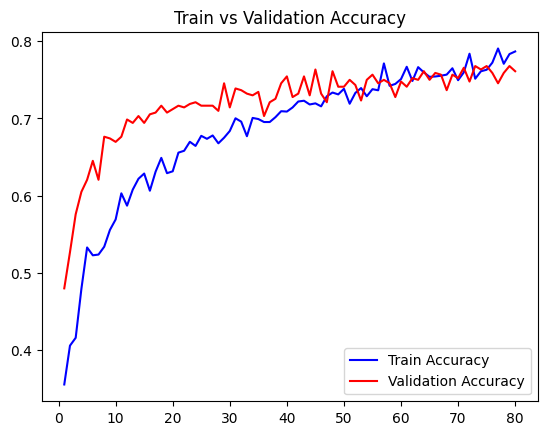

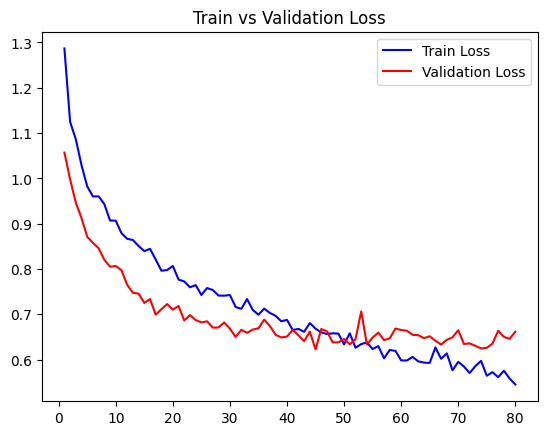

In [ ]:
# Visualización de la precisión y pérdida
acc = history.history['acc']
loss = history.history['loss']
validation_acc = history.history['val_acc']
validation_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Train Accuracy')
plt.plot(epochs, validation_acc, 'r', label='Validation Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Train Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.legend()

plt.show()